<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:

df.ENROLL = df.ENROLL.fillna(df.GRADES_ALL_G)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 8th grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [5]:
print(df.nunique()['YEAR'])

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [6]:
print("Michigan: " + str(df.loc[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()))
print("Ohio: " + str(df.loc[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()))

Michigan: 276.1666666666667
Ohio: 282.25


Find the average for your outcome score across all states in 2019

In [7]:
print(df.loc[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean())

281.2641509433962


Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [8]:
thingy = df.loc[df.groupby('STATE')['AVG_MATH_8_SCORE'].idxmax(), :]
print(thingy[["STATE", "AVG_MATH_8_SCORE"]])

                     STATE  AVG_MATH_8_SCORE
867                ALABAMA             269.0
766                 ALASKA             283.0
1175               ARIZONA             283.0
972               ARKANSAS             279.0
1309            CALIFORNIA             277.0
974               COLORADO             292.0
873            CONNECTICUT             289.0
874               DELAWARE             284.0
1670  DISTRICT_OF_COLUMBIA             269.0
1660                 DODEA             293.0
1080               FLORIDA             281.0
1351               GEORGIA             281.0
1082                HAWAII             281.0
879                  IDAHO             287.0
1084              ILLINOIS             285.0
1085               INDIANA             288.0
1188                  IOWA             286.0
781                 KANSAS             290.0
986               KENTUCKY             282.0
987              LOUISIANA             273.0
988                  MAINE             289.0
887       

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [21]:
df["expenditure_per_student"] = df["INSTRUCTION_EXPENDITURE"]/df["ENROLL"]

df.dropna(subset=['expenditure_per_student','AVG_MATH_4_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'YEAR'], inplace=True)
print(df)

             PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
561         2003_ALABAMA        ALABAMA  2003   727900.0      5196054.0   
562          2003_ALASKA         ALASKA  2003   133303.0      1425948.0   
563         2003_ARIZONA        ARIZONA  2003   875111.0      6529894.0   
564        2003_ARKANSAS       ARKANSAS  2003   450158.0      3241275.0   
565      2003_CALIFORNIA     CALIFORNIA  2003  6226552.0     59815855.0   
...                  ...            ...   ...        ...            ...   
1219       2015_VIRGINIA       VIRGINIA  2015  1279867.0     15857524.0   
1220     2015_WASHINGTON     WASHINGTON  2015  1072359.0     13709442.0   
1221  2015_WEST_VIRGINIA  WEST_VIRGINIA  2015   279565.0      3478401.0   
1222      2015_WISCONSIN      WISCONSIN  2015   861813.0     11637376.0   
1223        2015_WYOMING        WYOMING  2015    93867.0      1962874.0   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
561          567704.0    

Final feature list: expenditure_per_student, AVG_MATH_4_SCORE, AVG_READING_8_SCORE, AVG_READING_4_SCORE, YEAR

Feature selection justification: expenditure_per_student was chosen since more money spent per student might result in more resources per student and thus better academic performance. AVG_MATH_4_SCORE was chosen since students with a good math score in fourth grade might be more likely to have a strong math foundation, meaning they might be more likely to do well in an eighth grade math test. A high average fourth grade math score might also indicate that the state's math curriculum is more rigorous or is better designed. Similarly, AVG_READING_8_SCORE and AVG_READING_4_SCORE were chosen since a higher average English score might be indicative of a better designed overall curriculum. YEAR was chosen since more recent curriculums might be improved compared to older curriculums, resulting in better math scores.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0, 0.5, 'Average 8th Grade Math Score')

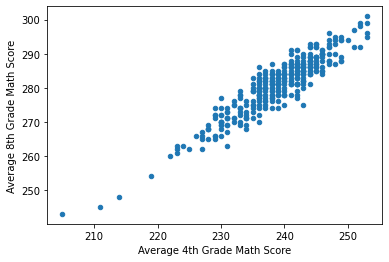

In [86]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_MATH_8_SCORE')
plt.xlabel('Average 4th Grade Math Score')
plt.ylabel('Average 8th Grade Math Score')

Average 4th Grade Math Score versus Average 8th Grade Math Score. There is clearly a strong linear correlation between the two math scores.

**Visualization 2**

Text(0, 0.5, 'Average 8th Grade Math Score')

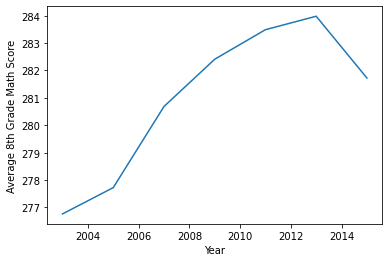

In [30]:
#df.plot.scatter(x='YEAR',y='AVG_MATH_8_SCORE')
df.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.xlabel('Year')
plt.ylabel('Average 8th Grade Math Score')

Year versus Average 8th Grade Math Score. Math scores seem to generally increase as time goes on.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[['expenditure_per_student', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'AVG_READING_4_SCORE', 'YEAR']]
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: Regression

In [66]:
# import your sklearn class here
from sklearn import linear_model

In [77]:
# create your model here
model = linear_model.Ridge()


In [78]:
model.fit(X_train, y_train)

Ridge()

In [79]:
y_pred = model.predict(X_test)

In [51]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/home/aldencheung2/Desktop/MDST/Tutorial/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

/home/aldencheung2/Desktop/MDST/Tutorial/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Text(0, 0.5, '8th Grade Math Score')

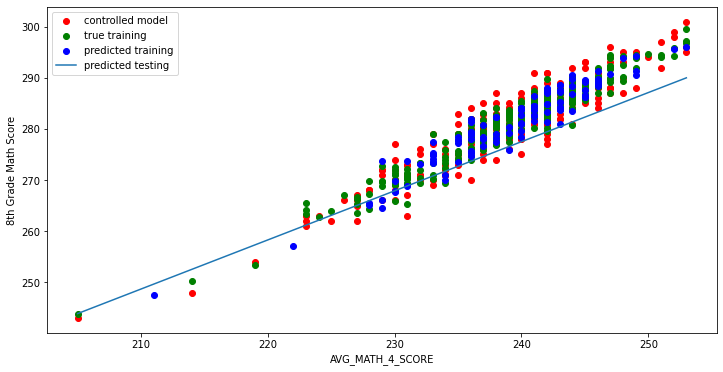

In [80]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_MATH_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')

<h2> Summary </h2>

This project was meant to use funding per student, previous math and English test scores, and year to predict eighth grade math scores. Funding per student was chosen on the basis that more funding per student might result in more learning resources, resulting in higher eighth grade math scores. Fourth grade math scores were also used as an independent variable since math is culminative in nature, and a better understanding of elementary math concepts may result in a better understanding of math in later years. Additionally, high fourth grade math scores may be indicative of a strong overall math curriculum for that state. English scores were used on the basis that strong students are often good in more than one subject, so high English scores may be correlated with high math scores. Finally, the year was used since curriculums may improve over the years. After choosing these predictor variables, I plotted their relationship with grade 8 math scores and found most were strong, positive correlations that were linear in nature. However, the predictor variables also had a strong linear correlation amongst themselves. Since ordinary least-squares methods of linear regression perform poorly in situations with high multicollinearity, I used ridge regression, which is meant to reduce the impact of multicollinearity. After training a ridge regression model, I plotted the model's performance using the average fourth grade math score, and found that the model generally performed well. Predicted eighth grade math scores are generally close to actual eighth grade math scores. Therefore, we can conclude that funding per student, previous test scores, and year are good predictors of eighth grade math scores, and that our model can predict eighth grade math scores to a reasonable degree of accuracy.